In [1]:
import pandas as pd

In [2]:
retail=pd.read_csv('MCR_OP.csv')

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79679 entries, 0 to 79678
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   invoice_number                79679 non-null  object 
 1   invoice_date                  79679 non-null  object 
 2   DayA                          79679 non-null  float64
 3   MonthB                        79679 non-null  float64
 4   YearC                         79679 non-null  float64
 5   invoice_date.1                79679 non-null  object 
 6   visit_type                    79679 non-null  object 
 7   visit_no                      79679 non-null  object 
 8   mrn                           79679 non-null  object 
 9   patient_name                  79679 non-null  object 
 10  patient_type                  66234 non-null  object 
 11  patient_gender                78697 non-null  object 
 12  year                          79679 non-null  int64  
 13  m

In [4]:
retail['invoice_date']=pd.to_datetime(retail['invoice_date'])

In [5]:
retail['dayofweek']=retail['invoice_date'].dt.dayofweek

In [6]:
retail['dayofweek'].value_counts()

dayofweek
0    16620
1    15350
5    12618
4    12047
3    11550
2     9230
6     2264
Name: count, dtype: int64

In [7]:
retail['date']=retail['invoice_date'].dt.strftime('%Y-%m-%d')

In [8]:
retail_grouped=retail.groupby(['item_name','date']).agg(total_sales=('quantity','sum')).reset_index()

In [9]:
retail_grouped

,item_name,date,total_sales
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-06,30
1,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-11,60
2,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-18,30
3,ABDOMINAL SUPPORT-.-LARGE-BELT NML05 NOVAMED-,2024-12-07,1
4,ABDOMINAL SUPPORT-.-XL-BELT NML05 NOVAMED-,2024-12-04,1
...,...,...,...
27995,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-26,30
27996,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-27,15
27997,ZONISAMIDE-CAPSULE-25MG-ZONISEP-,2024-12-16,60
27998,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,2024-12-20,40


In [10]:
cv_data=retail_grouped.groupby('item_name').agg(average=('total_sales','mean'),sd=('total_sales','std')).reset_index()

In [11]:
cv_data

,item_name,average,sd
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,40.000000,17.320508
1,ABDOMINAL SUPPORT-.-LARGE-BELT NML05 NOVAMED-,1.000000,NaN
2,ABDOMINAL SUPPORT-.-XL-BELT NML05 NOVAMED-,1.000000,NaN
3,ABEMACICLIB-TABLET-150MG-RAMIVEN-,56.000000,NaN
4,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,60.000000,0.000000
...,...,...,...
3272,ZOLPIDEM-TABLET-10MG-ZOLFRESH-,17.857143,9.063270
3273,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,21.250000,16.460079
3274,ZONISAMIDE-CAPSULE-25MG-ZONISEP-,60.000000,NaN
3275,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,40.000000,NaN


In [12]:
cv_data_cleaned=cv_data.dropna(subset=['sd'])

In [13]:
cv_data_cleaned

,item_name,average,sd
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,40.000000,17.320508
4,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,60.000000,0.000000
5,ABSORBENT COTTON ROLL-.-15GM-.-,1.181818,0.750757
7,ACAMPROSATE CALCIUM-TABLET-333MG-ACAMPROL-,189.000000,97.580736
10,ACARBOSE-TABLET-50MG-GLUCOBAY-,25.000000,7.071068
...,...,...,...
3269,ZOLMITRIPTAN-SPRAY-5%W/V 7MD-ZOLMIST-,3.000000,2.828427
3270,ZOLPIDEM+MELATONIN-TABLET-10MG+3MG-ZOLSOMA-,13.800000,16.870750
3271,ZOLPIDEM+MELATONIN-TABLET-5MG+3MG-ZOLSOMA-,17.882353,15.846460
3272,ZOLPIDEM-TABLET-10MG-ZOLFRESH-,17.857143,9.063270


In [14]:
cv_data_cleaned['cv_squared']=(cv_data_cleaned['sd']/cv_data_cleaned['average'])**2

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\770739033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data_cleaned['cv_squared']=(cv_data_cleaned['sd']/cv_data_cleaned['average'])**2


In [15]:
cv_data_cleaned

,item_name,average,sd,cv_squared
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,40.000000,17.320508,0.187500
4,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,60.000000,0.000000,0.000000
5,ABSORBENT COTTON ROLL-.-15GM-.-,1.181818,0.750757,0.403550
7,ACAMPROSATE CALCIUM-TABLET-333MG-ACAMPROL-,189.000000,97.580736,0.266566
10,ACARBOSE-TABLET-50MG-GLUCOBAY-,25.000000,7.071068,0.080000
...,...,...,...,...
3269,ZOLMITRIPTAN-SPRAY-5%W/V 7MD-ZOLMIST-,3.000000,2.828427,0.888889
3270,ZOLPIDEM+MELATONIN-TABLET-10MG+3MG-ZOLSOMA-,13.800000,16.870750,1.494551
3271,ZOLPIDEM+MELATONIN-TABLET-5MG+3MG-ZOLSOMA-,17.882353,15.846460,0.785263
3272,ZOLPIDEM-TABLET-10MG-ZOLFRESH-,17.857143,9.063270,0.257600


In [16]:
product_by_date=retail.groupby(['item_name','date']).agg(count=('item_name','count')).reset_index()

In [17]:
product_by_date=product_by_date.sort_values(by=['item_name','date'])

In [18]:
product_by_date

,item_name,date,count
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-06,1
1,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-11,1
2,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-18,1
3,ABDOMINAL SUPPORT-.-LARGE-BELT NML05 NOVAMED-,2024-12-07,1
4,ABDOMINAL SUPPORT-.-XL-BELT NML05 NOVAMED-,2024-12-04,1
...,...,...,...
27995,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-26,2
27996,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-27,1
27997,ZONISAMIDE-CAPSULE-25MG-ZONISEP-,2024-12-16,1
27998,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,2024-12-20,1


In [19]:
skus=product_by_date['item_name'].unique()

In [20]:
skus.size

3277

In [21]:
empty_dataframe=pd.DataFrame()

In [22]:
for sku in skus:
    a=product_by_date[product_by_date.item_name==sku]
    a['previous_date']=product_by_date['date'].shift(1)
    empty_dataframe=pd.concat([empty_dataframe,a],axis=0)

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date']=product_by_date['date'].shift(1)
C:\Users\108242\AppData\Local\Temp\ipykernel_11968\1424678031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [23]:
empty_dataframe


,item_name,date,count,previous_date
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-06,1,None
1,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-11,1,2024-12-06
2,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-18,1,2024-12-11
3,ABDOMINAL SUPPORT-.-LARGE-BELT NML05 NOVAMED-,2024-12-07,1,2024-12-18
4,ABDOMINAL SUPPORT-.-XL-BELT NML05 NOVAMED-,2024-12-04,1,2024-12-07
...,...,...,...,...
27995,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-26,2,2024-12-24
27996,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-27,1,2024-12-26
27997,ZONISAMIDE-CAPSULE-25MG-ZONISEP-,2024-12-16,1,2024-12-27
27998,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,2024-12-20,1,2024-12-16


In [56]:
empty_dataframe['previous_date'].info()

<class 'pandas.core.series.Series'>
Index: 25009 entries, 1 to 27999
Series name: previous_date
Non-Null Count  Dtype         
--------------  -----         
25009 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [24]:
empty_dataframe['date']=pd.to_datetime(empty_dataframe['date'])

2+2

In [57]:
empty_dataframe['date'].info()

<class 'pandas.core.series.Series'>
Index: 25009 entries, 1 to 27999
Series name: date
Non-Null Count  Dtype         
--------------  -----         
25009 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [25]:
empty_dataframe['previous_date']=pd.to_datetime(empty_dataframe['previous_date'])

In [86]:
empty_dataframe=empty_dataframe.sort_values(by=['item_name','date','previous_date'])

In [87]:
empty_dataframe['Duration']=empty_dataframe['date']-empty_dataframe['previous_date']

In [88]:
empty_dataframe['Duration']

1        5 days
2        7 days
5       26 days
7        2 days
8        2 days
          ...  
27994    1 days
27995    2 days
27996    1 days
27998    4 days
27999   11 days
Name: Duration, Length: 25009, dtype: timedelta64[ns]

In [89]:
empty_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25009 entries, 1 to 27999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   item_name      25009 non-null  object         
 1   date           25009 non-null  datetime64[ns] 
 2   count          25009 non-null  int64          
 3   previous_date  25009 non-null  datetime64[ns] 
 4   Duration       25009 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 1.1+ MB


In [90]:
#empty_dataframe['Duration']=pd.to_numeric(empty_dataframe['Duration'])

In [91]:
#empty_dataframe=empty_dataframe[empty_dataframe['Duration']>=0]

In [92]:
empty_dataframe


,item_name,date,count,previous_date,Duration
1,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-11,1,2024-12-06,5 days
2,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,2024-12-18,1,2024-12-11,7 days
5,ABEMACICLIB-TABLET-150MG-RAMIVEN-,2024-12-30,1,2024-12-04,26 days
7,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,2024-12-20,1,2024-12-18,2 days
8,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,2024-12-22,1,2024-12-20,2 days
...,...,...,...,...,...
27994,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-24,1,2024-12-23,1 days
27995,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-26,2,2024-12-24,2 days
27996,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,2024-12-27,1,2024-12-26,1 days
27998,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,2024-12-20,1,2024-12-16,4 days


In [93]:
empty_dataframe['Duration']=empty_dataframe['Duration'].astype('string').str.replace('days','')

In [94]:
empty_dataframe['Duration']=pd.to_numeric(empty_dataframe['Duration'],errors='coerce')

In [95]:
ADI= empty_dataframe.groupby('item_name').agg(ADI=('Duration','mean')).reset_index()

In [96]:
ADI

,item_name,ADI
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,6.0
1,ABEMACICLIB-TABLET-150MG-RAMIVEN-,26.0
2,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,2.0
3,ABSORBENT COTTON ROLL-.-15GM-.-,2.9
4,ACAMPROSATE CALCIUM-TABLET-333MG-ACAMPROL-,7.5
...,...,...
2814,ZOLPIDEM+MELATONIN-TABLET-5MG+3MG-ZOLSOMA-,1.625
2815,ZOLPIDEM-TABLET-10MG-ZOLFRESH-,4.333333
2816,ZOLPIDEM-TABLET-5MG-ZOLFRESH-,1.315789
2817,ZONISAMIDE-CAPSULE-50MG-ZONISEP-,4.0


In [97]:
adi_cv=pd.merge(ADI,cv_data_cleaned)

In [98]:
adi_cv

,item_name,ADI,average,sd,cv_squared
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,6.0,40.000000,17.320508,0.187500
1,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,2.0,60.000000,0.000000,0.000000
2,ABSORBENT COTTON ROLL-.-15GM-.-,2.9,1.181818,0.750757,0.403550
3,ACAMPROSATE CALCIUM-TABLET-333MG-ACAMPROL-,7.5,189.000000,97.580736,0.266566
4,ACARBOSE-TABLET-50MG-GLUCOBAY-,7.0,25.000000,7.071068,0.080000
...,...,...,...,...,...
2650,ZOLMITRIPTAN-SPRAY-5%W/V 7MD-ZOLMIST-,1.0,3.000000,2.828427,0.888889
2651,ZOLPIDEM+MELATONIN-TABLET-10MG+3MG-ZOLSOMA-,2.0,13.800000,16.870750,1.494551
2652,ZOLPIDEM+MELATONIN-TABLET-5MG+3MG-ZOLSOMA-,1.625,17.882353,15.846460,0.785263
2653,ZOLPIDEM-TABLET-10MG-ZOLFRESH-,4.333333,17.857143,9.063270,0.257600


In [99]:
adi_cv=adi_cv[adi_cv['cv_squared']<10]

In [100]:
def category(dataframe):
    a=0
    if (dataframe['ADI'] <= 1.34) & (dataframe['cv_squared'] <= 0.49):
        a = 'Smooth'
    if (dataframe['ADI'] >= 1.34) & (dataframe['cv_squared'] >= 0.49):
        a = 'Lumpy'
    if (dataframe['ADI'] <= 1.34) & (dataframe['cv_squared'] >= 0.49):
        a = 'Erratic'
    if (dataframe['ADI'] >= 1.34) & (dataframe['cv_squared'] <= 0.49):
        a = 'intermittent'
    return a
    

In [101]:
adi_cv['category']=adi_cv.apply(category,axis=1)

C:\Users\108242\AppData\Local\Temp\ipykernel_11968\2693051291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adi_cv['category']=adi_cv.apply(category,axis=1)


In [102]:
adi_cv['category']

0       intermittent
1       intermittent
2       intermittent
3       intermittent
4       intermittent
            ...     
2650         Erratic
2651           Lumpy
2652           Lumpy
2653    intermittent
2654         Erratic
Name: category, Length: 2635, dtype: object

In [103]:
import seaborn as sns

<Axes: xlabel='cv_squared', ylabel='ADI'>

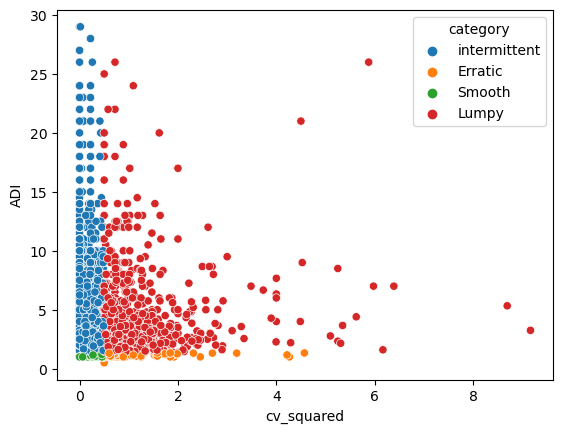

In [104]:
sns.scatterplot(x='cv_squared',y='ADI',hue='category',data=adi_cv)

In [105]:
#sns.barplot(x='cv_squared', y='ADI',hue='category', data=adi_cv)

In [106]:
adi_cv.category.value_counts()

category
intermittent    1378
Lumpy            867
Smooth           214
Erratic          176
Name: count, dtype: int64

In [107]:
adi_cv.head()

,item_name,ADI,average,sd,cv_squared,category
0,3N BUTYLPHTHALIDE+NICOTINAMIDE RIBOSIDE-CAPSUL...,6.0,40.000000,17.320508,0.187500,intermittent
1,ABIRATERONE ACETATE-TABLET-500MG-XBIRA-,2.0,60.000000,0.000000,0.000000,intermittent
2,ABSORBENT COTTON ROLL-.-15GM-.-,2.9,1.181818,0.750757,0.403550,intermittent
3,ACAMPROSATE CALCIUM-TABLET-333MG-ACAMPROL-,7.5,189.000000,97.580736,0.266566,intermittent
4,ACARBOSE-TABLET-50MG-GLUCOBAY-,7.0,25.000000,7.071068,0.080000,intermittent


In [108]:
adi_cv.to_excel('adi_cv1.xlsx')